# Model Performance Metrics in Machine Learning

This notebook covers the most important model performance metrics used in both **classification** and **regression** tasks, including explanations and Python examples.


In [1]:

import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, roc_curve
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import load_breast_cancer, make_regression
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Classification Metrics

We'll use the **Breast Cancer** dataset from sklearn to demonstrate classification metrics.

In [2]:

# Load classification dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [3]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9766081871345029
Precision: 0.9814814814814815
Recall: 0.9814814814814815
F1-Score: 0.9814814814814815
ROC-AUC: 0.9976484420928865


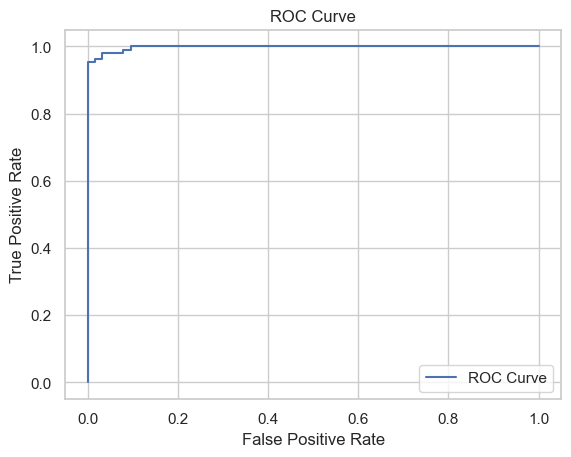

In [4]:

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Regression Metrics

We'll use synthetic regression data to demonstrate metrics for regression models.

In [5]:

# Create regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [6]:

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 16.838531283373857
MSE: 465.0137632245306
RMSE: 21.564177777613747
R² Score: 0.9490420860581621


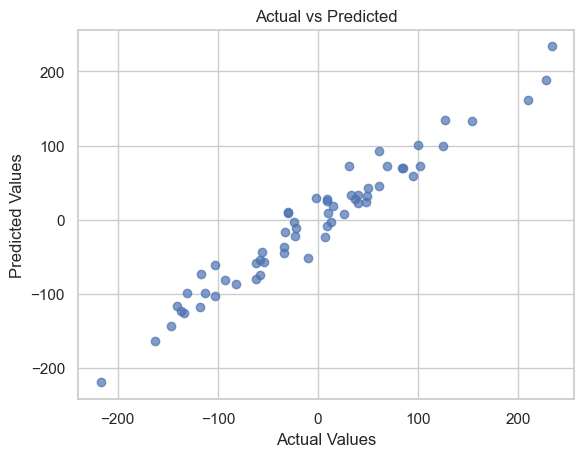

In [7]:

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()
